<a href="https://colab.research.google.com/github/aniilkeles/Machine-Learning-Projects/blob/main/LinearRegression/18_SimpleLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/1-studyhours.csv')

In [ ]:
df.head()

,Study Hours,Exam Score
0,3.9,40.0
1,9.6,57.1
2,4.5,42.7
3,11.4,65.1
4,14.4,78.7


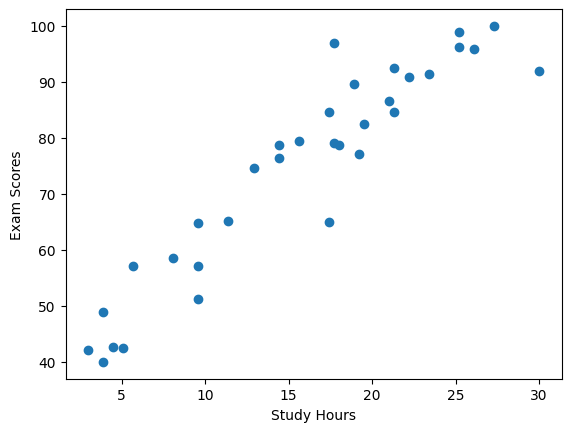

In [ ]:
plt.scatter(df['Study Hours'],df['Exam Score'])
plt.xlabel("Study Hours")
plt.ylabel("Exam Scores")
plt.show()

In [ ]:
# independent(x) and dependent(y) features
# Makine öğrenmesi algoritmaları bizden çoğu zaman x i girdileri independent featuresları bir dataframe df olarak vermemizi ister sebebide genelde birden fazla olması ama burda bir tane
# y yani dependent çıktılarda da series ister çünkü çıktı 1 tane olacağı için

X = df[['Study Hours']]
y = df['Exam Score']

In [ ]:
type(X)

pandas.core.frame.DataFrame

In [ ]:
type(y)

pandas.core.series.Series

In [ ]:
# test - train split

In [ ]:
# Genel olarak bir makine öğrenimi algoritmasını kullanıp model,bir matematik formülü oluştururken datasetimizi ikiye bölmeye çalışırız bir kısmını train bir kısmını test için kullanırız
# train modeli eğitmek için testte modeli test etmek için kullanılır

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=15) # data pointlerin yüzde 80 X traine yüzde 20 sini X test e aynı mantık y içinde

In [ ]:
y_train

,Exam Score
18,64.9
1,57.1
2,42.7
32,89.6
6,77.1
3,65.1
29,82.4
26,64.8
9,84.6
4,78.7


In [ ]:
y_test

,Exam Score
25,42.4
14,86.6
30,91.5
16,57.2
24,51.2
20,49.0
19,84.7


In [ ]:
# standardize the data set

In [ ]:
from sklearn.preprocessing import StandardScaler # StandardScaler kütüphanesi bizim istediğimiz train ve test verilerini küçültecek ya da büyültüp standart hale getircek bunun içinde z formülünu kullanacak

In [ ]:
# bizim datasetimizde kolanlar az ama başka bir datasetiyle çalıştığımız zaman birden fazla kolonlar olabilirdi mesela ev fiyatlarını tahmin etmeye çalışıyoruz diyelim bi yerde m2 var bi yerde evin lokasyonları var
# diyelim başka bir kolondada evin kaç senelik olduğu var çok farklı metriklerde farklı farklı kolonlar olabilir buda eğitime soktuğumuzda modeli kolonlar birbirinden farklı olacağı için bunları birbirleriyle
# kıyasladığımızda yanlışlıkla çok büyük rakamlı olan kolona daha küçük veya daha büyük katsayılar verebiliriz teta 1 teta 2 teta 3 gibi
# bu yüzden standartlaştırma yaptığımızda global minumum da gradient descent de daha iyi çalışır
# X train ve X test i standartlaştırma yaparız
#-1 1 arası veya 0 1 arasına koyarız genelde standartlaştırmada

In [ ]:
# balanced feature values
# efficient gradient descent
# l1,l2

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train

,Study Hours
18,17.4
1,9.6
2,4.5
32,18.9
6,19.2
3,11.4
29,19.5
26,9.6
9,17.4
4,14.4


In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) # fit=> data leakage(data sızması)            # önce fiti çağırıp sonra transformu çağırabiliriz ya da direk fit transformu çağırabiliriz aynı şey
                                              # standart scaler z formülünü uyguluyor z formülüde hatırlayacak olursak X ten o datasetin ortalamasını çıkarıp standart sapmaya bölerek buluyorduk
                                              # X train dediğimiz şey X train datasetindeki verileri toplayıp ortalamasını alır bu işleme fit deriz o ortalamadan güncel X çıkarılır
                                              # yani fit dediğimiz şey münün(ortalamanın) ve standart sapmanın hesaplanması demektir aslında transformda bu işlemin uygulanıp küçültülmesi anlamına gelmektedir
                                              # X test te de fit transform demeyip sadece transform dememizin nedeni X trainde zaten standart sapma ve müyü hesapladık o yüzden bu standart sapma ve ortalamaya göre yap
                                              # X testte biz tekrardan bir şey hesaplatmak istemiyoruz ama X trainle bir model oluşturacağız ve bu modelin X testle ilgili hiçbir şey bilmesini istemiyoruz

In [ ]:
X_train

array([[ 0.11794385],
       [-0.97424848],
       [-1.68837424],
       [ 0.32798083],
       [ 0.36998823],
       [-0.7222041 ],
       [ 0.41199563],
       [-0.97424848],
       [ 0.11794385],
       [-0.30213013],
       [ 0.15995124],
       [ 0.66404001],
       [-0.13410054],
       [ 1.50418796],
       [-0.51216711],
       [ 0.15995124],
       [-0.30213013],
       [ 1.21013618],
       [ 1.33615837],
       [ 0.7900622 ],
       [-1.77238903],
       [-1.89841122],
       [ 0.20195864],
       [ 1.88225453],
       [-1.18428547],
       [ 1.21013618]])

In [ ]:
X_test

array([[-1.60435944],
       [ 0.62203261],
       [ 0.95809179],
       [-1.52034465],
       [-0.97424848],
       [-1.77238903],
       [ 0.66404001]])

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linear_regression = LinearRegression()

In [ ]:
linear_regression.fit(X_train,y_train)

LinearRegression()

In [ ]:
print("Coefficient : ",linear_regression.coef_) # coefficient teta 1 intercept(y eksenini nerde kestiği) teta 0
print("Intercept : ",linear_regression.intercept_)

Coefficient :  [16.17860223]
Intercept :  76.9076923076923


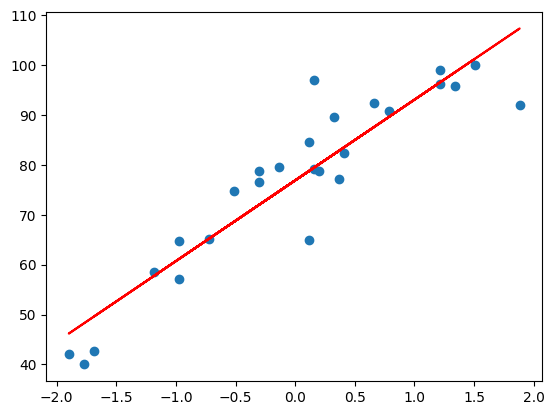

In [ ]:
# y = 76.9 + 16.17 çarpı X      mesela X olarak 0 saat çalıştığımızda diyelim 76.9 alıcakmışız ya da 1 saat çalıştığımızda 76.9+ 16.17 alacağımızı düşünebiliriz
                              # yalnız burdaki X standardize edilmiş hali yani o yüzden mesela 1 saat çalıştığımızda hangi aralığa giriyorsa -1 le 1 aralığında onu almış olucaz aslında
                              # standart scale edilmiş halini vermiş olmamız lazım

plt.scatter(X_train,y_train)
plt.plot(X_train,linear_regression.predict(X_train),"r")
plt.show()
# bu çizgi bizim best fit lineımız

In [ ]:
# x = 20 , y=?

linear_regression.predict([[20]]) # Burda X ler dataframe olarak alınması gerektiği için [[]] kullandık

array([400.47973694])

In [ ]:
# yukarıda görüldüğü gibi 20 girdisini standart scale la vermemiz gerek
scaler.transform([[20]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.48200796]])

In [ ]:
linear_regression.predict(scaler.transform([[20]])) # özetle 20 saat çalışan biri sınavdan 84 alacak

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([84.70590731])

In [ ]:
linear_regression.predict(scaler.transform([[10]]))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([62.05187491])

In [ ]:
linear_regression.predict(scaler.transform([[0]]))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([39.39784252])

In [ ]:
# prediction with test data

In [ ]:
y_pred_test=linear_regression.predict(X_test)

In [ ]:
y_test

,Exam Score
25,42.4
14,86.6
30,91.5
16,57.2
24,51.2
20,49.0
19,84.7


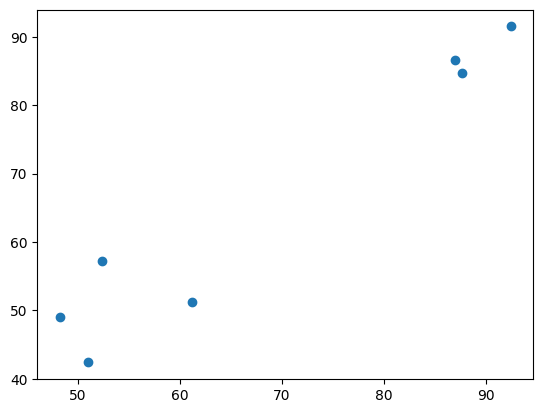

In [ ]:
plt.scatter(y_pred_test,y_test)
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:
mse = mean_squared_error(y_test,y_pred_test)
mae= mean_absolute_error(y_test,y_pred_test)
rmse = np.sqrt(mse)
print("mse : ",mse)
print("mae : ",mae)
print("rmse : ",rmse)

mse :  29.45839048833392
mae :  4.054868128856142
rmse :  5.427558427906043


In [ ]:
# yukarıda görülen metricler daha çok başka bir algoritmayla model oluşturduğumuzda o regresyonun mse,mae,rmse hesaplayıp bunun rmse si daha düşük çıktı demekki bu daha iyi olabilir gibi yorumlarda kullanırız
# kıyaslarken daha mantıklı
r2 = r2_score(y_test,y_pred_test)
print("R2 SCORE : ",r2)

R2 SCORE :  0.9196596206825491


In [ ]:
1-(1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1) # adjusted r2 score formula

0.903591544819059